In [20]:
import gc
import os
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras import backend as K
warnings.filterwarnings(action='ignore')

K.image_data_format()

'channels_last'

In [21]:
DATA_PATH = './job_fair_programmers/'
os.listdir(DATA_PATH)

['faces_images.zip',
 'test_vision.csv',
 'faces_images',
 'sample_output_vision.csv',
 'train_vision.csv']

In [22]:
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_vision.csv'))
df_test  = pd.read_csv(os.path.join(DATA_PATH, 'test_vision.csv'))

In [23]:
df_train.head()


,filename,label
0,face_3267.png,1
1,face_587.png,4
2,face_6585.png,4
3,face_3094.png,4
4,face_1170.png,4


In [24]:
df_test.head()

,filename
0,face_2624.png
1,face_3385.png
2,face_5015.png
3,face_6715.png
4,face_6171.png


In [25]:
# Data 갯수
print("Number of Train Data : {}".format(df_train.shape[0]))
print("Number of Train Data : {}".format(df_test.shape[0]))

Number of Train Data : 5850
Number of Train Data : 2000


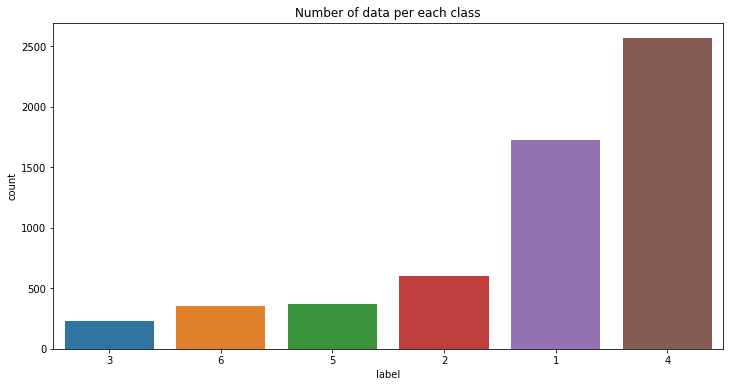

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(df_train["label"], order=df_train["label"].value_counts(ascending=True).index)
plt.title("Number of data per each class")
plt.show()

## Train set으로부터 validation 나누기

In [38]:
from sklearn.model_selection import train_test_split

df_train["label"] = df_train["label"].astype('str')

df_train = df_train[['filename', 'label']]

its = np.arange(df_train.shape[0])
train_idx, val_idx = train_test_split(its, train_size = 0.8, random_state=42)

X_train = df_train.iloc[train_idx, :]
X_val = df_train.iloc[val_idx, :]

print(X_train.shape)
print(X_val.shape)


(4680, 2)
(1170, 2)


In [39]:
print(X_train)

           filename label
4862  face_4335.png     2
3268  face_1643.png     2
5718  face_4709.png     1
3384  face_5479.png     4
113   face_6863.png     1
4962  face_6885.png     6
5625  face_6810.png     4
1695  face_4624.png     4
3754   face_369.png     1
5357  face_4274.png     2
4470  face_3274.png     4
1662   face_229.png     5
1684  face_3700.png     4
5193  face_1535.png     2
2516  face_6884.png     1
4228  face_4478.png     5
2313   face_563.png     6
4253  face_2159.png     5
3435  face_5903.png     1
252   face_5921.png     1
350   face_6804.png     4
2618  face_2612.png     4
2402  face_5988.png     4
457   face_5640.png     2
3700  face_3123.png     1
479   face_3969.png     1
1114  face_1563.png     4
798   face_4398.png     4
5098  face_2973.png     1
1586  face_7849.png     4
...             ...   ...
1082  face_7795.png     4
474   face_7761.png     1
2904   face_502.png     1
4843  face_1730.png     4
4117   face_638.png     1
3385  face_7822.png     1
4555  face_7

In [40]:
print(X_val)

           filename label
1374  face_2532.png     1
808   face_2537.png     2
4842   face_926.png     4
23    face_7609.png     1
755    face_972.png     4
3326  face_6291.png     4
3815  face_6288.png     4
3090  face_5075.png     1
5039  face_5092.png     4
3795  face_2751.png     4
1244  face_6025.png     4
1095  face_5843.png     2
4861  face_5673.png     4
5478  face_5722.png     1
4763  face_4902.png     4
4099  face_2302.png     1
1242    face_43.png     4
764   face_5937.png     1
2847   face_139.png     1
1103   face_902.png     1
2287   face_955.png     1
881   face_4563.png     6
4985  face_3915.png     4
5214  face_2209.png     4
4235  face_4882.png     4
1782  face_1069.png     4
3382  face_2725.png     1
5049  face_2782.png     1
4149  face_6572.png     1
408     face_37.png     4
...             ...   ...
3826  face_5067.png     4
1454  face_7640.png     1
1756  face_6309.png     2
693   face_7412.png     4
2714  face_5205.png     4
1983   face_453.png     4
287   face_5

In [42]:
X_train.to_csv("train.csv", columns=['filename', 'label'], index=False)

In [43]:
X_val.to_csv("val.csv", columns=['filename', 'label'], index=False)